In [ ]:
pip install scikit-learn


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/HP/Newfolder/Datasets/road_data.csv")


In [4]:
pd.set_option("display.max.rows", 1000)


In [5]:
df

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-III,3,1,2,0,1,1,29.100,15.62000,18.730,5.5321,11.200
1,Andhra Pradesh,Bapatla,PMGSY-II,6,0,6,0,0,0,53.430,28.74360,53.763,24.3953,0.000
2,Andhra Pradesh,East Godavari,PMGSY-I,104,2,104,2,0,0,252.056,54.52700,249.354,43.5468,0.000
3,Andhra Pradesh,East Godavari,PMGSY-III,9,0,6,0,3,0,55.732,28.91710,36.907,17.0887,18.820
4,Andhra Pradesh,Eluru,PMGSY-I,175,2,175,2,0,0,421.675,99.62210,417.125,114.8553,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,West Bengal,Paschim Medinipur,PMGSY-III,28,0,0,0,28,0,267.988,231.62961,0.000,0.0000,267.988
2259,West Bengal,Purba Burdwan,PMGSY-I,253,4,253,4,0,0,1349.102,543.36375,1319.389,495.9742,0.000
2260,West Bengal,Purba Burdwan,PMGSY-III,27,1,2,0,25,1,262.320,224.35171,19.250,11.5298,243.070
2261,West Bengal,Uttardinajpur,PMGSY-I,351,4,351,4,0,0,1463.526,662.19252,1437.278,580.5011,0.000


In [6]:
df.nunique()

STATE_NAME                             32
DISTRICT_NAME                         716
PMGSY_SCHEME                            5
NO_OF_ROAD_WORK_SANCTIONED            421
NO_OF_BRIDGES_SANCTIONED               75
NO_OF_ROAD_WORKS_COMPLETED            412
NO_OF_BRIDGES_COMPLETED                69
NO_OF_ROAD_WORKS_BALANCE               64
NO_OF_BRIDGES_BALANCE                  34
LENGTH_OF_ROAD_WORK_SANCTIONED_KM    2210
COST_OF_WORKS_SANCTIONED_LAKHS       2263
LENGTH_OF_ROAD_WORK_COMPLETED_KM     2101
EXPENDITURE_OCCURED_LAKHS            2133
LENGTH_OF_ROAD_WORK_BALANCE_KM        807
dtype: int64

In [7]:
df.isnull().sum()

STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
NO_OF_BRIDGES_SANCTIONED             0
NO_OF_ROAD_WORKS_COMPLETED           0
NO_OF_BRIDGES_COMPLETED              0
NO_OF_ROAD_WORKS_BALANCE             0
NO_OF_BRIDGES_BALANCE                0
LENGTH_OF_ROAD_WORK_SANCTIONED_KM    0
COST_OF_WORKS_SANCTIONED_LAKHS       0
LENGTH_OF_ROAD_WORK_COMPLETED_KM     0
EXPENDITURE_OCCURED_LAKHS            0
LENGTH_OF_ROAD_WORK_BALANCE_KM       0
dtype: int64

In [8]:
df.describe()

,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
count,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000
mean,83.990720,5.284578,80.254971,4.129916,3.735749,1.154662,368.374352,173.793298,341.117811,146.809598,19.522585
std,146.375039,13.214424,147.015135,11.905385,9.893374,4.644281,556.438194,239.926437,542.917078,229.884532,52.147143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.847800,0.000000,-267.041500,-0.005000
25%,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,67.382500,40.150250,49.001000,26.327150,0.000000
50%,19.000000,0.000000,14.000000,0.000000,0.000000,0.000000,141.220000,90.126500,112.005000,64.334600,0.000000
75%,88.000000,4.000000,83.500000,3.000000,3.000000,0.000000,414.613500,195.860190,385.234500,155.167350,11.730000
max,1263.000000,220.000000,1263.000000,209.000000,167.000000,89.000000,4546.134000,2004.871570,4349.940000,1964.506500,561.520000


In [9]:
df.dtypes

STATE_NAME                            object
DISTRICT_NAME                         object
PMGSY_SCHEME                          object
NO_OF_ROAD_WORK_SANCTIONED             int64
NO_OF_BRIDGES_SANCTIONED               int64
NO_OF_ROAD_WORKS_COMPLETED             int64
NO_OF_BRIDGES_COMPLETED                int64
NO_OF_ROAD_WORKS_BALANCE               int64
NO_OF_BRIDGES_BALANCE                  int64
LENGTH_OF_ROAD_WORK_SANCTIONED_KM    float64
COST_OF_WORKS_SANCTIONED_LAKHS       float64
LENGTH_OF_ROAD_WORK_COMPLETED_KM     float64
EXPENDITURE_OCCURED_LAKHS            float64
LENGTH_OF_ROAD_WORK_BALANCE_KM       float64
dtype: object

In [10]:
 df2 = df.iloc[:,3:15]

<Axes: >

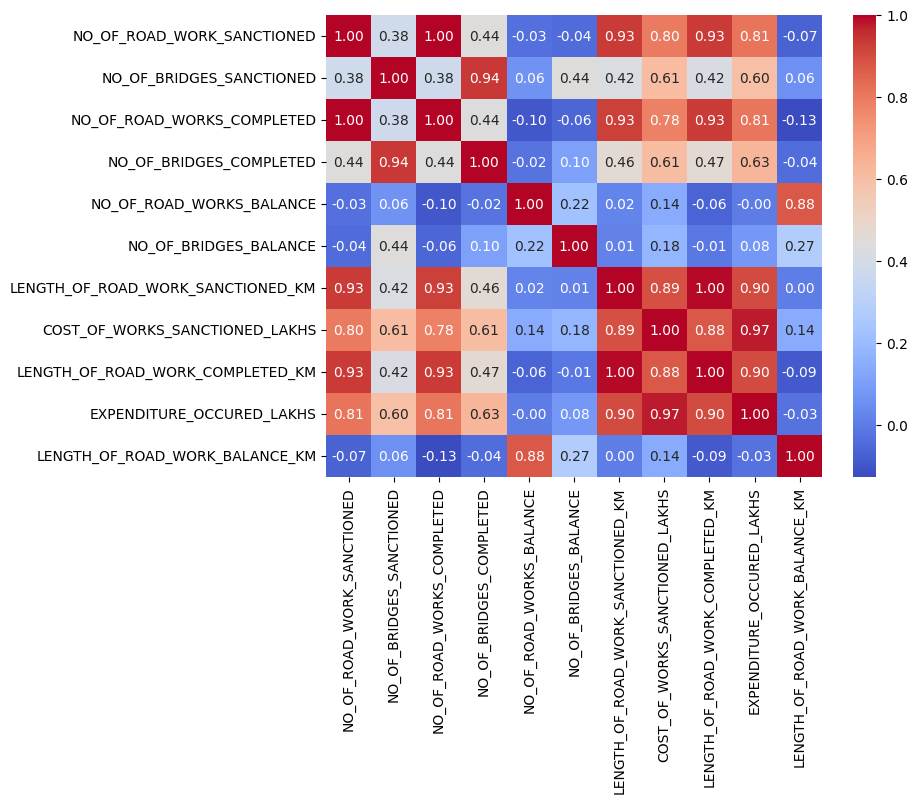

In [11]:
cormat = df2.corr()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
seaborn.heatmap(cormat, annot=True, cmap='coolwarm', fmt=".2f")



In [195]:
df2

,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,3,1,2,0,1,1,29.100,15.62000,18.730,5.5321,11.200
1,6,0,6,0,0,0,53.430,28.74360,53.763,24.3953,0.000
2,104,2,104,2,0,0,252.056,54.52700,249.354,43.5468,0.000
3,9,0,6,0,3,0,55.732,28.91710,36.907,17.0887,18.820
4,175,2,175,2,0,0,421.675,99.62210,417.125,114.8553,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2258,28,0,0,0,28,0,267.988,231.62961,0.000,0.0000,267.988
2259,253,4,253,4,0,0,1349.102,543.36375,1319.389,495.9742,0.000
2260,27,1,2,0,25,1,262.320,224.35171,19.250,11.5298,243.070
2261,351,4,351,4,0,0,1463.526,662.19252,1437.278,580.5011,0.000


In [169]:
Y = df2.iloc[:,8]

X = df2.drop(columns = ["EXPENDITURE_OCCURED_LAKHS"])

In [170]:
X

,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,3,1,2,0,1,1,29.100,15.62000,18.730,11.200
1,6,0,6,0,0,0,53.430,28.74360,53.763,0.000
2,104,2,104,2,0,0,252.056,54.52700,249.354,0.000
3,9,0,6,0,3,0,55.732,28.91710,36.907,18.820
4,175,2,175,2,0,0,421.675,99.62210,417.125,0.000
...,...,...,...,...,...,...,...,...,...,...
2258,28,0,0,0,28,0,267.988,231.62961,0.000,267.988
2259,253,4,253,4,0,0,1349.102,543.36375,1319.389,0.000
2260,27,1,2,0,25,1,262.320,224.35171,19.250,243.070
2261,351,4,351,4,0,0,1463.526,662.19252,1437.278,0.000


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [172]:
model = LinearRegression()  # Instantiate the Linear Regression model
model.fit(X_train, y_train)  # Fit the model to the training data

LinearRegression()

In [173]:
y_pred = model.predict(X_test)  # Predict on test data


In [174]:
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.981900761981251e-26


In [175]:
print(model.coef_)

[ 1.52462987e-15  3.66373598e-15 -5.27355937e-16 -6.33174069e-16
  1.94112846e-15  4.89595886e-15 -7.21644966e-16  5.55111512e-17
  1.00000000e+00 -1.24900090e-16]


In [176]:
print(model.intercept_)

1.1368683772161603e-13


In [177]:
print(results.pvalues)

NameError: name 'results' is not defined

In [178]:
r2 = r2_score(y_test, y_pred)
r2

1.0

In [ ]:
y_test - y_pred

In [179]:
col_name = ['NO_OF_ROAD_WORK_SANCTIONED','NO_OF_BRIDGES_SANCTIONED',
            'NO_OF_ROAD_WORKS_COMPLETED','NO_OF_BRIDGES_COMPLETED',
            'NO_OF_ROAD_WORKS_BALANCE','NO_OF_BRIDGES_BALANCE',
            'LENGTH_OF_ROAD_WORK_SANCTIONED_KM','COST_OF_WORKS_SANCTIONED_LAKHS',
            'LENGTH_OF_ROAD_WORK_COMPLETED_KM','EXPENDITURE_OCCURED_LAKHS',
            'LENGTH_OF_ROAD_WORK_BALANCE_KM']

NO_OF_ROAD_WORK_SANCTIONED
NO_OF_BRIDGES_SANCTIONED
NO_OF_ROAD_WORKS_COMPLETED
NO_OF_BRIDGES_COMPLETED
NO_OF_ROAD_WORKS_BALANCE
NO_OF_BRIDGES_BALANCE
LENGTH_OF_ROAD_WORK_SANCTIONED_KM
COST_OF_WORKS_SANCTIONED_LAKHS
LENGTH_OF_ROAD_WORK_COMPLETED_KM
EXPENDITURE_OCCURED_LAKHS
LENGTH_OF_ROAD_WORK_BALANCE_KM


In [190]:
for i in col_name:
    Y = df2[i]
    X = df2.drop(columns = i)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0., random_state=42)
    model = LinearRegression()  # Instantiate the Linear Regression model
    model.fit(X_train, y_train)  # Fit the model to the training data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    r2 = r2_score(y_test, y_pred)
    print(r2)

1.0
1.0
1.0
1.0
1.0
1.0
0.9996342448063069
0.9814949080790135
0.9996575366489238
0.9816520734782113
0.9673775310118017


,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,1,2,0,1,1,29.100,15.62000,18.730,5.5321,11.200
1,0,6,0,0,0,53.430,28.74360,53.763,24.3953,0.000
2,2,104,2,0,0,252.056,54.52700,249.354,43.5468,0.000
3,0,6,0,3,0,55.732,28.91710,36.907,17.0887,18.820
4,2,175,2,0,0,421.675,99.62210,417.125,114.8553,0.000
...,...,...,...,...,...,...,...,...,...,...
2258,0,0,0,28,0,267.988,231.62961,0.000,0.0000,267.988
2259,4,253,4,0,0,1349.102,543.36375,1319.389,495.9742,0.000
2260,1,2,0,25,1,262.320,224.35171,19.250,11.5298,243.070
2261,4,351,4,0,0,1463.526,662.19252,1437.278,580.5011,0.000


In [ ]:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()  # Instantiate the Linear Regression model
    model.fit(X_train, y_train)  # Fit the model to the training data